In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# Scan R0 F1 power and frequency

In [5]:
fname = "2020_10_1.hdf"
dset_name = "1601584481 scan R0 F1 power"
title = "scanning detection power"

dset_names = [dset_name]
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM')

In [23]:
pmt_channel = 1
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [38]:
qswitch_fired = []
qswitch_not_fired = []
for key, val in pxie.items():
    if np.max(np.abs(val[:,0])) > 100:
        qswitch_fired.append(key)
    else:
        qswitch_not_fired.append(key)
qswitch_fired.sort()
qswitch_not_fired.sort()

In [49]:
qswitch_fired = np.arange(len(pxie))+1

In [50]:
ch = 1
powers = [5]
indices_grouped = {p: {'open': [], 'closed': []} for p in powers}
data_grouped = {p: {'open': [], 'closed': []} for p in powers}

for idx in qswitch_fired:
    attrs = pxie_attrs[idx]
    p = attrs['Seed2Amplifier SetCurrent']
    try:
        if attrs['ShutterControl SetVoltage'] == '0':
            indices_grouped[p]['closed'].append(idx)
            data_grouped[p]['closed'].append(pxie[idx][:,ch])
        elif attrs['ShutterControl SetVoltage'] == '5':
            indices_grouped[p]['open'].append(idx)
            data_grouped[p]['open'].append(pxie[idx][:,ch])
    except KeyError:
        pass

In [51]:
idx_pairs_open = {idx_pxie: find_nearest_idx(data_devices['Laser Lock']['time'], 
                                             pxie_time[idx_pxie]) for idx_pxie in indices_grouped[5]['open']}
idx_pairs_closed = {idx_pxie: find_nearest_idx(data_devices['Laser Lock']['time'], 
                                             pxie_time[idx_pxie]) for idx_pxie in indices_grouped[5]['closed']}

In [61]:
ch = 1
integrals = [-np.trapz(pxie[idx][250:2000, ch]-np.mean(pxie[idx][0:200, ch])) for idx in qswitch_fired]

In [70]:
integrals_open, freqs_open = combine_arrays_irregular(idx_pairs_open.keys(), integrals, 
                                            [idx_pairs_open[idx] for idx in idx_pairs_open.keys()], 
                                            data_devices['Laser Lock']['laser 2 frequency'])
integrals_open, freqs_open = np.array(integrals_open), np.array(freqs_open)

integrals_closed, freqs_closed = combine_arrays_irregular(idx_pairs_closed.keys(), integrals, 
                                            [idx_pairs_closed[idx] for idx in idx_pairs_closed.keys()], 
                                            data_devices['Laser Lock']['laser 2 frequency'])
integrals_closed, freqs_closed = np.array(integrals_closed), np.array(freqs_closed)

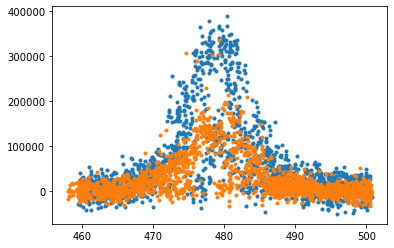

In [72]:
plt.plot(freqs_open, integrals_open, '.')
plt.plot(freqs_closed, integrals_closed, '.')

In [109]:
bins_mo, bin_data_mo = bin_data(freqs_open, integrals_open, width = 1)
bins_mc, bin_data_mc = bin_data(freqs_closed, integrals_closed, width = 1)

In [110]:
bin_data_mo_avg = average_binned_data(bins_mo, bin_data_mo)
bin_data_mc_avg = average_binned_data(bins_mc, bin_data_mc)

<BarContainer object of 45 artists>

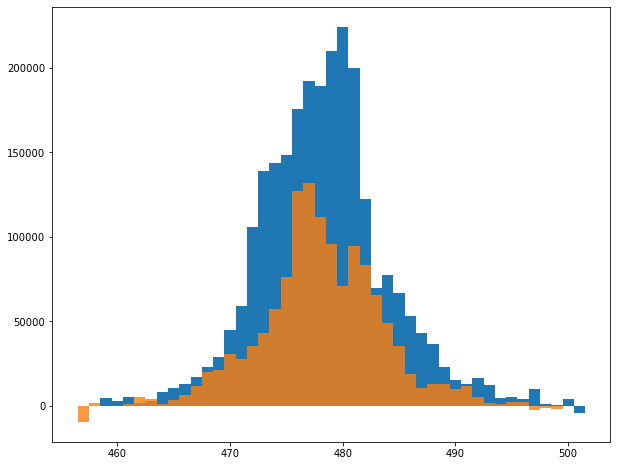

In [111]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(bins_mo, [bin_data_mo_avg[b][0] for b in bin_data_mo], width = 1)
ax.bar(bins_mc, [bin_data_mc_avg[b][0] for b in bin_data_mc], width = 1, alpha = 0.8)

In [115]:
freq_range = np.arange(465,490,1)
y = []
for key in freq_range:
    try:
      y.append(bin_data_mo_avg[key][0]/bin_data_mc_avg[key][0])  
    except Exception as e:
        print(e)
        pass
y = np.array(y)

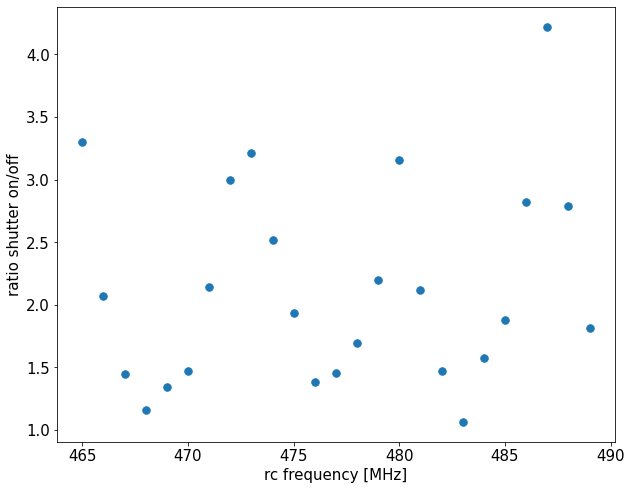

In [116]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(freq_range, y, '.', ms = 15)
# ax.plot(bins_mo, savgol_filter(y, 9, 1), lw = 3, zorder = 0)

ax.set_xlabel('rc frequency [MHz]')
ax.set_ylabel('ratio shutter on/off')
set_fontsize(ax, 15)

In [99]:
freq = 473
print(len(bin_data_mo[freq]), len(bin_data_mc[freq]))

36 54


In [100]:
freq = 476
print(len(bin_data_mo[freq]), len(bin_data_mc[freq]))

37 30


# Only Scan R0 F1 power

rc cooling uv power 38 mW

In [117]:
dset_name = "1601587418 scan R0 F1 power"

In [118]:
pmt_channel = 1
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [124]:
powers_mW = [4.9, 6.5, 8.8, 12, 18.5, 25.5]

In [119]:
qswitch_fired = []
qswitch_not_fired = []
for key, val in pxie.items():
    if np.max(np.abs(val[:,0])) > 100:
        qswitch_fired.append(key)
    else:
        qswitch_not_fired.append(key)
qswitch_fired.sort()
qswitch_not_fired.sort()

In [121]:
ch = 1
powers = np.linspace(5, 7.5, 6)
indices_grouped = {p: {'open': [], 'closed': []} for p in powers}
data_grouped = {p: {'open': [], 'closed': []} for p in powers}

for idx in qswitch_fired:
    attrs = pxie_attrs[idx]
    p = attrs['Seed2Amplifier SetCurrent']
    if attrs['ShutterControl SetVoltage'] == '0':
        indices_grouped[p]['closed'].append(idx)
        data_grouped[p]['closed'].append(pxie[idx][:,ch])
    elif attrs['ShutterControl SetVoltage'] == '5':
        indices_grouped[p]['open'].append(idx)
        data_grouped[p]['open'].append(pxie[idx][:,ch])

5.0 A -> integral ratio : 2.09189 +/- 0.12200
5.5 A -> integral ratio : 2.20980 +/- 0.09177
6.0 A -> integral ratio : 2.11022 +/- 0.07246
6.5 A -> integral ratio : 2.06380 +/- 0.07762
7.0 A -> integral ratio : 2.07371 +/- 0.08543
7.5 A -> integral ratio : 1.88854 +/- 0.11857


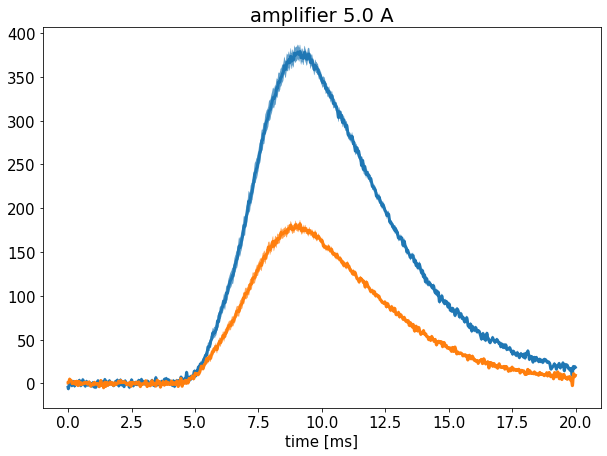

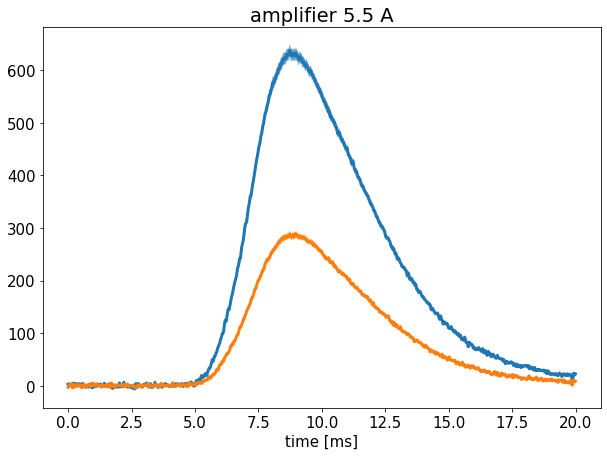

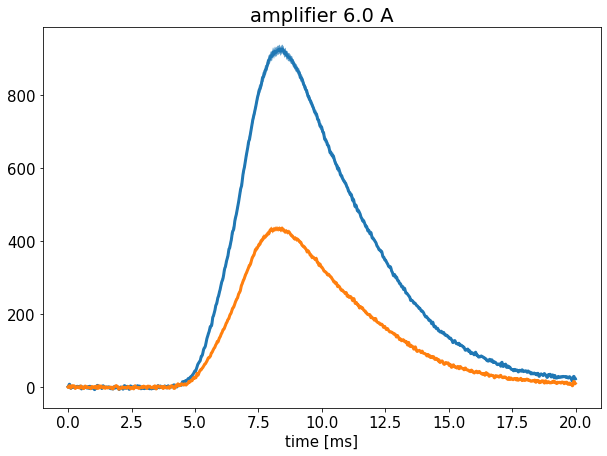

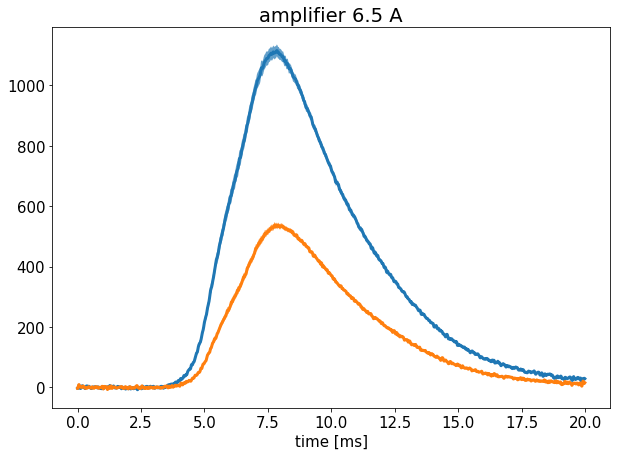

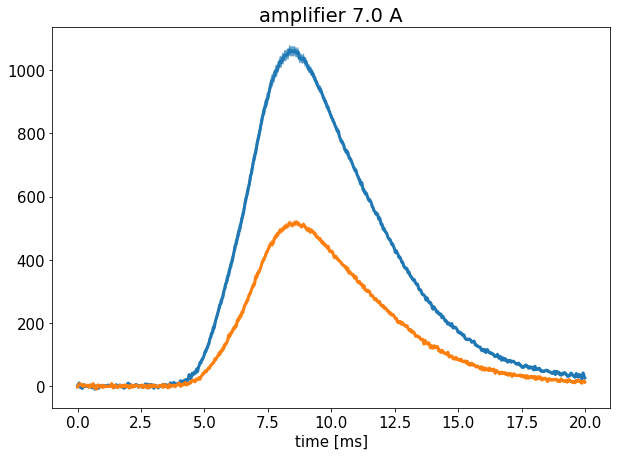

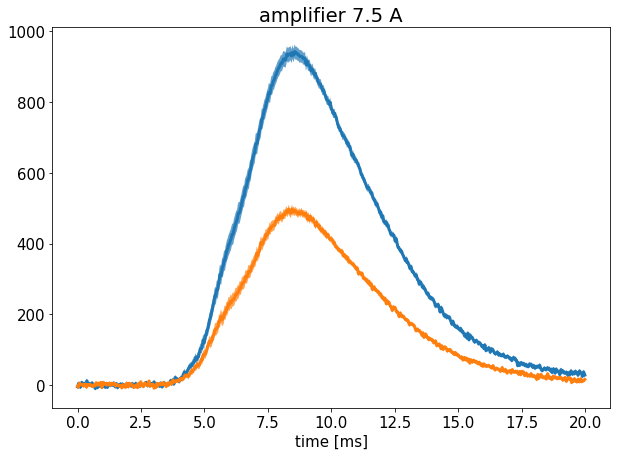

In [122]:
from scipy.signal import savgol_filter

ratios = []

for p in powers:
    yo = np.mean(data_grouped[p]['open'], axis = 0)
    yc = np.mean(data_grouped[p]['closed'], axis = 0)
    yo -= np.mean(yo[:300])
    yc -= np.mean(yc[:300])

    lo = len(data_grouped[p]['open'])
    lc = len(data_grouped[p]['closed'])

    syo = np.std(data_grouped[p]['open'], axis = 0)
    syo /= np.sqrt(lo)
    syc = np.std(data_grouped[p]['closed'], axis = 0)
    syc /= np.sqrt(lc)

    

    x = np.linspace(0,1999,2000)/100

    fig, ax = plt.subplots(figsize = (10,7))
    ax.plot(x, -savgol_filter(yo, 5, 3), lw = 3)
    ax.plot(x, -savgol_filter(yc, 5, 3), lw = 3)
    
    ax.fill_between(x, -yo-syo, -yo+syo, alpha = .7)
    ax.fill_between(x, -yc-syc, -yc+syc, alpha = .7)
    
    ax.set_xlabel('time [ms]')
    ax.set_title(f'amplifier {p:.1f} A')
    
    set_fontsize(ax, 15)
    
    trapzo = np.trapz(-yo)
    trapzc = np.trapz(-yc)
    trapz_error = (trapzo/trapzc)*np.sqrt((np.sum(syo)/trapzo)**2 + (np.sum(syc)/trapzc)**2)
    print(f'{p:.1f} A -> integral ratio : {np.trapz(-yo)/np.trapz(-yc):.5f} +/- {trapz_error:.5f}')
    
    ratios.append((trapzo/trapzc,trapz_error))

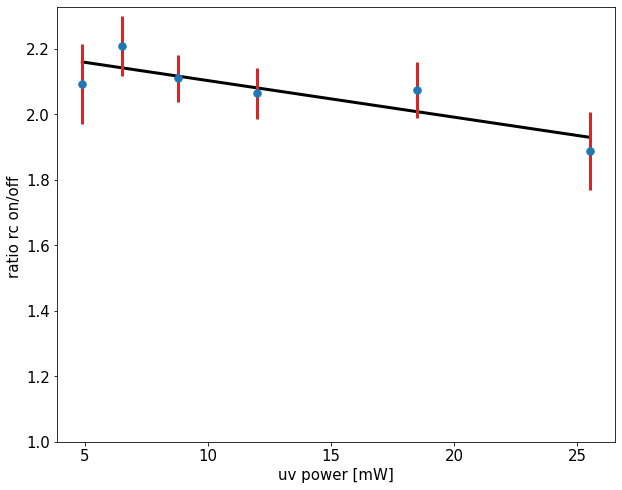

In [125]:
y, yerr = zip(*ratios)
fig, ax = plt.subplots(figsize = (10,8))

ax.errorbar(powers_mW, y, yerr, fmt = '.', ecolor = 'C3', lw = 3, ms = 15)

f = np.polyfit(powers_mW, y, 1)

ax.plot(powers_mW, np.poly1d(f)(powers_mW), lw = 3, color = 'k', zorder = 0)
ax.set_ylim(ymin = 1)
ax.set_xlabel('uv power [mW]')
ax.set_ylabel('ratio rc on/off ')

set_fontsize(ax, 15)

# With Phase Modulation

In [126]:
dset_name = "1601594800 scan R0 F1 power with phase modulation on rc"

In [128]:
pmt_channel = 1
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices = [])

In [129]:
qswitch_fired = []
qswitch_not_fired = []
for key, val in pxie.items():
    if np.max(np.abs(val[:,0])) > 100:
        qswitch_fired.append(key)
    else:
        qswitch_not_fired.append(key)
qswitch_fired.sort()
qswitch_not_fired.sort()

In [132]:
ch = 1
powers = [5]
indices_grouped = {p: {'open': [], 'closed': []} for p in powers}
data_grouped = {p: {'open': [], 'closed': []} for p in powers}

for idx in qswitch_fired:
    attrs = pxie_attrs[idx]
    p = attrs['Seed2Amplifier SetCurrent']
    if attrs['ShutterControl SetVoltage'] == '0':
        indices_grouped[p]['closed'].append(idx)
        data_grouped[p]['closed'].append(pxie[idx][:,ch])
    elif attrs['ShutterControl SetVoltage'] == '5':
        indices_grouped[p]['open'].append(idx)
        data_grouped[p]['open'].append(pxie[idx][:,ch])

5.0 A -> integral ratio : 2.22565 +/- 0.14320


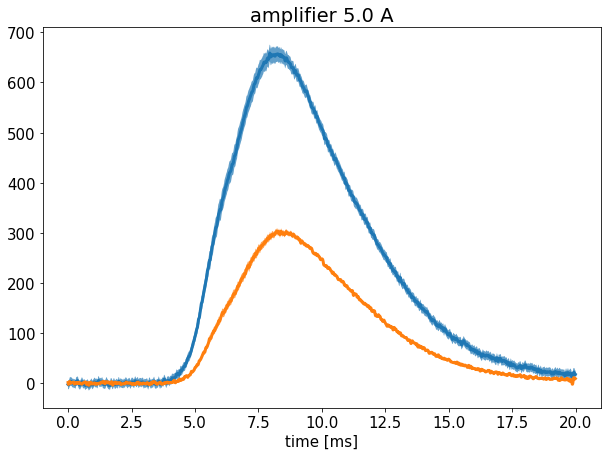

In [133]:
from scipy.signal import savgol_filter

ratios = []

for p in powers:
    yo = np.mean(data_grouped[p]['open'], axis = 0)
    yc = np.mean(data_grouped[p]['closed'], axis = 0)
    yo -= np.mean(yo[:300])
    yc -= np.mean(yc[:300])

    lo = len(data_grouped[p]['open'])
    lc = len(data_grouped[p]['closed'])

    syo = np.std(data_grouped[p]['open'], axis = 0)
    syo /= np.sqrt(lo)
    syc = np.std(data_grouped[p]['closed'], axis = 0)
    syc /= np.sqrt(lc)

    

    x = np.linspace(0,1999,2000)/100

    fig, ax = plt.subplots(figsize = (10,7))
    ax.plot(x, -savgol_filter(yo, 5, 3), lw = 3)
    ax.plot(x, -savgol_filter(yc, 5, 3), lw = 3)
    
    ax.fill_between(x, -yo-syo, -yo+syo, alpha = .7)
    ax.fill_between(x, -yc-syc, -yc+syc, alpha = .7)
    
    ax.set_xlabel('time [ms]')
    ax.set_title(f'amplifier {p:.1f} A')
    
    set_fontsize(ax, 15)
    
    trapzo = np.trapz(-yo)
    trapzc = np.trapz(-yc)
    trapz_error = (trapzo/trapzc)*np.sqrt((np.sum(syo)/trapzo)**2 + (np.sum(syc)/trapzc)**2)
    print(f'{p:.1f} A -> integral ratio : {np.trapz(-yo)/np.trapz(-yc):.5f} +/- {trapz_error:.5f}')
    
    ratios.append((trapzo/trapzc,trapz_error))